In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as smf
from matplotlib import pyplot
import statsmodels.formula.api as smf

In [2]:
passengers_data = pd.read_excel(r"C:\Amit Dubli\ExcelR\ExcelR assignments & material\Data Science\01 Assignments\18 Forecasting\Airlines_Data.xlsx")

In [3]:
passengers_data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
passengers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
passengers_data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


<AxesSubplot:xlabel='Month', ylabel='Passengers'>

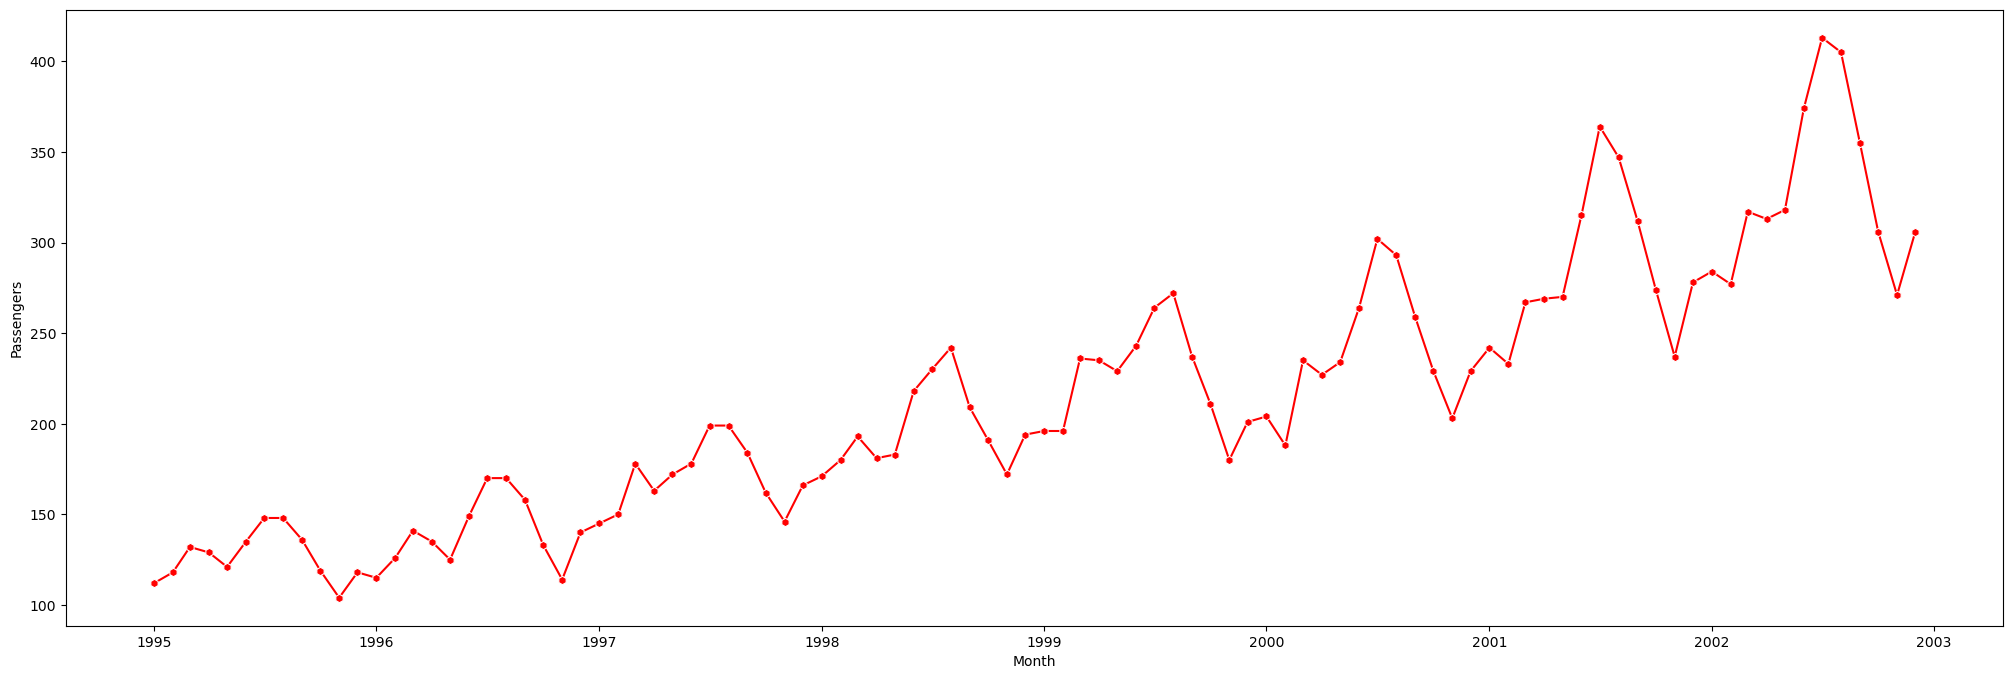

In [7]:
ax = plt.subplots(figsize=(25, 8))
sns.lineplot(x = "Month",y = "Passengers", data = passengers_data , color = "red", marker = "h")

In [ ]:
# Observations
# 1. Number of passengers are increasing in every consecutive years.
# 2. Everyyear people are travelling more in the months of July, August & September.
# 3. Also there is always a dip in number of passengers in the month of November.

In [8]:
passengers_data['Month'] = pd.to_datetime(passengers_data['Month'])
passengers_data['Months'] = passengers_data['Month'].dt.strftime('%b')
passengers_data.head()

,Month,Passengers,Months
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May


In [10]:
month_dummies = pd.DataFrame(pd.get_dummies(passengers_data['Months']))
passenger1 = pd.concat([passengers_data,month_dummies],axis = 1)
passengers_data.head()

,Month,Passengers,Months
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May


In [11]:
passenger1["t"] = np.arange(1,97)
passenger1["t_squared"] = passenger1["t"]*passenger1["t"]
passenger1["log_Passengers"] = np.log(passenger1["Passengers"])
passenger1.columns
passenger1.head()

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [12]:
Train = passenger1.head(75)
Test = passenger1.tail(25)

In [13]:
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
print("RMSE Linear: ",rmse_linear)

RMSE Linear:  51.83809749584508


In [14]:
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
print("RMSE Exponential: ",rmse_Exp)

RMSE Exponential:  42.775259750198046


In [15]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
print("RMSE Quadratic: ",rmse_Quad)

RMSE Quadratic:  54.03140645625298


In [16]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
print("RMSE Additive seasonality: ",rmse_add_sea)

RMSE Additive seasonality:  123.02763788084236


In [17]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
print("RMSE Additive Seasonality Quadratic:",rmse_add_sea_quad )

RMSE Additive Seasonality Quadratic: 36.53627444546718


In [18]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
print("RMSE Multiplicative Seasonality:",rmse_Mult_sea)

RMSE Multiplicative Seasonality: 128.16622817596152


In [23]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE Multiplicative Additive Seasonality:",rmse_Mult_add_sea )

RMSE Multiplicative Additive Seasonality: 11.5658254376861


In [24]:
data1 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data1)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,51.838097
1,rmse_Exp,42.775260
2,rmse_Quad,54.031406
3,rmse_add_sea,123.027638
4,rmse_add_sea_quad,36.536274
5,rmse_Mult_sea,128.166228
6,rmse_Mult_add_sea,11.565825


In [ ]:
# As lower the RMSE value suggests the better model performance i.e. model predictions are closure to the actual values so from above RMSE values its clear that -
# The best model appears to be rmse_Mult_add_sea with an RMSE of 11.565825. This model likely provides the most accurate predictions among the ones listed.
# rmse_Exp and rmse_add_sea_quad also have relatively low RMSE values, suggesting they are performing well.
# rmse_linear and rmse_Quad have intermediate RMSE values, indicating moderate prediction accuracy.
# rmse_add_sea and rmse_Mult_sea have higher RMSE values compared to the others, indicating they may not be performing as well in comparison.

In [25]:
data = [['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-5-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov'],['2003-12-01', 'Dec']]
forecast = pd.DataFrame(data, columns = ['Date', 'Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-5-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [26]:
dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast_1 = pd.concat([forecast,dummies],axis = 1)

forecast_1["t"] = np.arange(1,13)   
forecast_1["t_squared"] = forecast_1["t"]*forecast_1["t"] 
forecast_1

,Date,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared
0,2003-01-01,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,2003-02-01,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4
2,2003-03-01,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9
3,2003-04-01,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16
4,2003-5-01,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25
5,2003-06-01,Jun,0,0,0,0,0,0,1,0,0,0,0,0,6,36
6,2003-07-01,Jul,0,0,0,0,0,1,0,0,0,0,0,0,7,49
7,2003-08-01,Aug,0,1,0,0,0,0,0,0,0,0,0,0,8,64
8,2003-09-01,Sep,0,0,0,0,0,0,0,0,0,0,0,1,9,81
9,2003-10-01,Oct,0,0,0,0,0,0,0,0,0,0,1,0,10,100


In [27]:
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data =passenger1).fit()
new  = pd.Series(model_full.predict(forecast_1))

forecast_1["Forecasted_log"] = pd.Series(new)
forecast_1['Forecasted_Passengers'] = np.exp(forecast_1['Forecasted_log'])

In [28]:
Final = forecast_1.loc[:, ['Date', 'Forecasted_Passengers']] 
Final

,Date,Forecasted_Passengers
0,2003-01-01,109.176148
1,2003-02-01,110.331245
2,2003-03-01,127.315234
3,2003-04-01,123.200587
4,2003-5-01,122.399578
5,2003-06-01,138.536397
6,2003-07-01,154.066959
7,2003-08-01,153.741209
8,2003-09-01,137.693733
9,2003-10-01,120.894736


<AxesSubplot:xlabel='Date', ylabel='Forecasted_Passengers'>

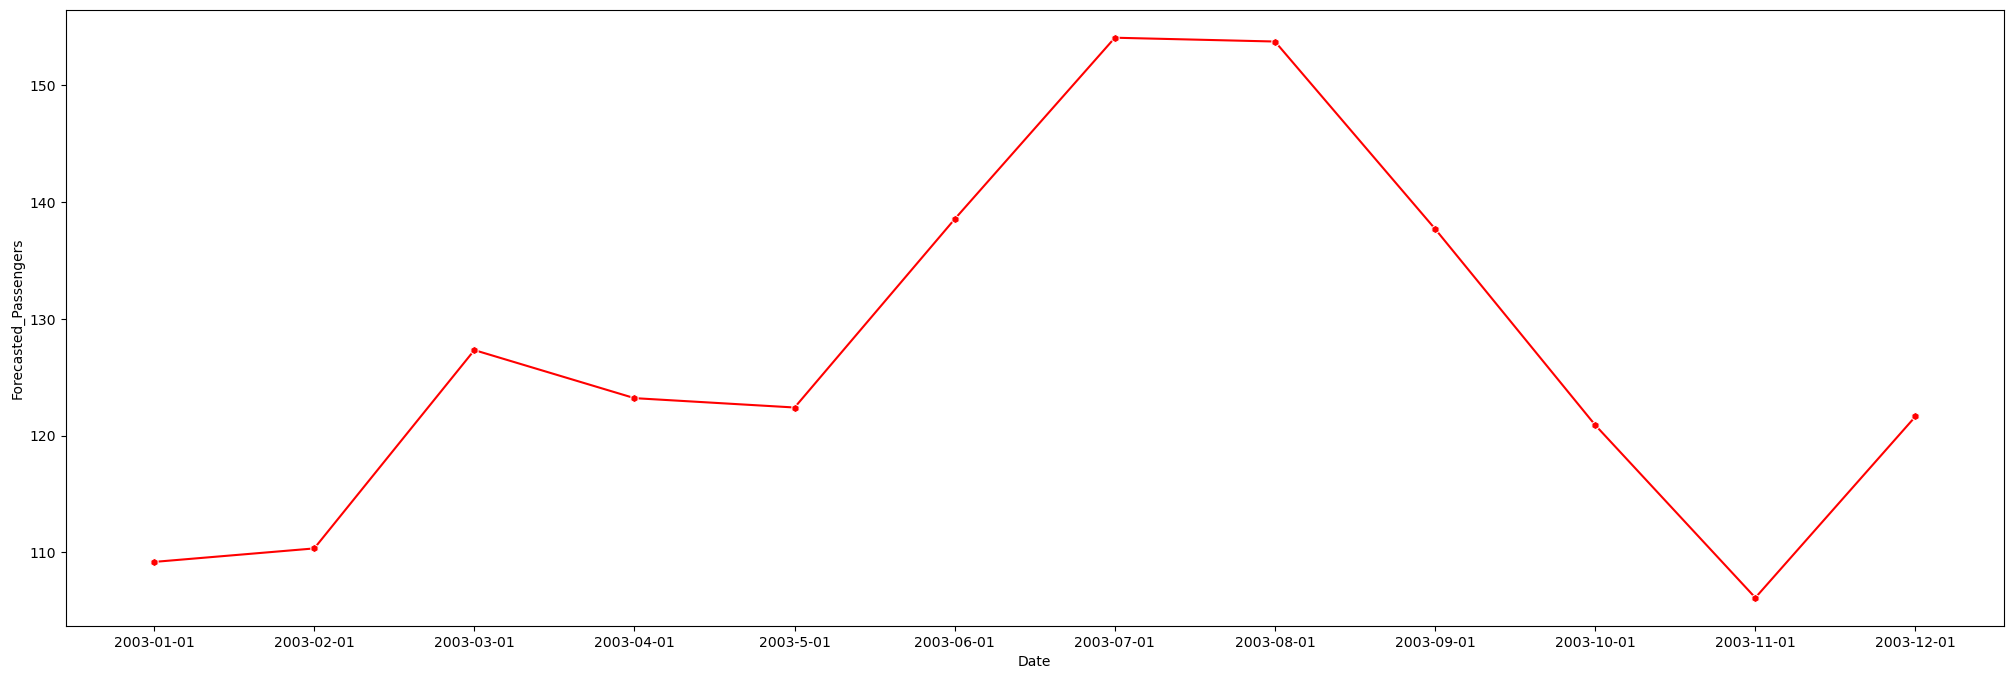

In [37]:
ax = plt.subplots(figsize=(25, 8))
sns.lineplot(x = "Date",y = "Forecasted_Passengers", data = Final, color = "red", marker = "h")

In [ ]:
# Forecasted trend is same as what we have seen in the past years and thus we can test and Train our existing data to 
# predict the future.

# COCACOLA

In [2]:
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import itertools
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import itertools
import warnings

In [6]:
# Load and preprocess the data
cocacola_data = pd.read_excel(r"C:\Amit Dubli\ExcelR\ExcelR assignments & material\Data Science\01 Assignments\18 Forecasting\Cocacola_data.xlsx")

In [7]:
cocacola_data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [8]:
cocacola_1 = cocacola_data.copy()

In [9]:
cocacola_1

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [10]:
cocacola_1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [11]:
cocacola_1.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [12]:
temp = cocacola_1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')
cocacola_1['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')
cocacola_1.head()

C:\Users\Amit D\AppData\Local\Temp\ipykernel_16012\1811024122.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  temp = cocacola_1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')


,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [13]:
cocacola_1 = cocacola_1.drop(['Quarter'], axis=1)
cocacola_1.reset_index(inplace=True)
cocacola_1['quater'] = pd.to_datetime(cocacola_1['quater'])
cocacola_1 = cocacola_1.set_index('quater')

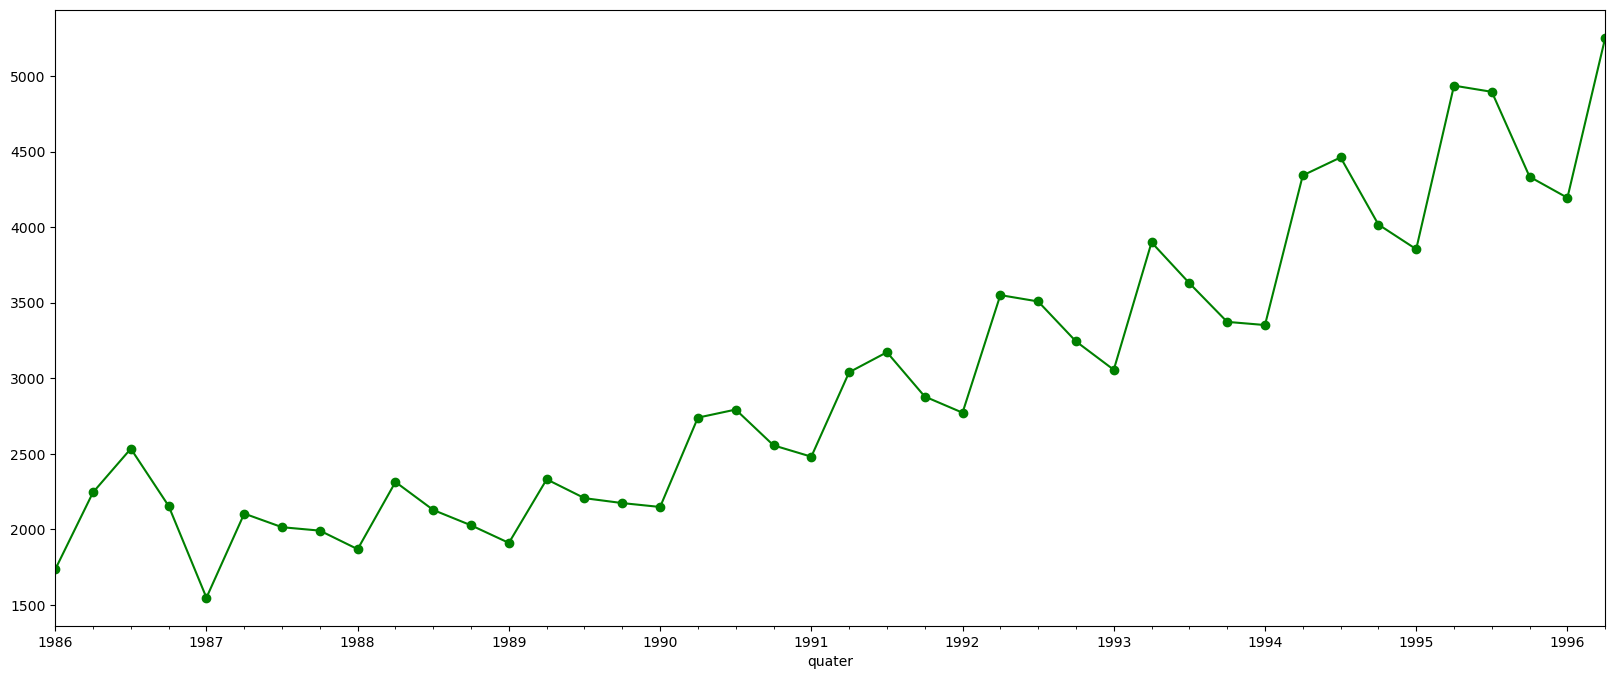

In [14]:
cocacola_1['Sales'].plot(figsize=(20, 8),color='green',marker='o')
plt.show()

In [ ]:
# 1. Sales are continously increasing year by year.
# 2. From 1986 to 1990 trend was bit different than from year 1990 to 1996.

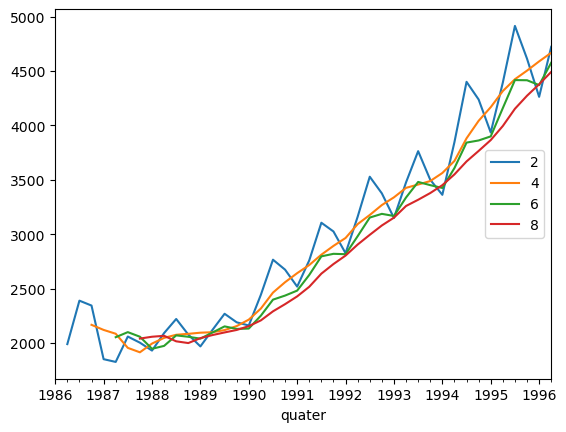

In [15]:
for i in range(2,10,2):
    cocacola_1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=5)

In [ ]:
# Rolling average also clearly shows that sales are increasing along with the year.

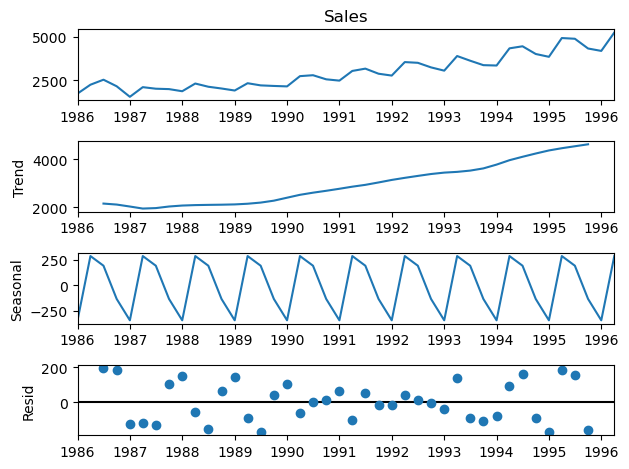

In [16]:
ts_add = seasonal_decompose(cocacola_1.Sales,model="additive")
fig = ts_add.plot()
plt.show()

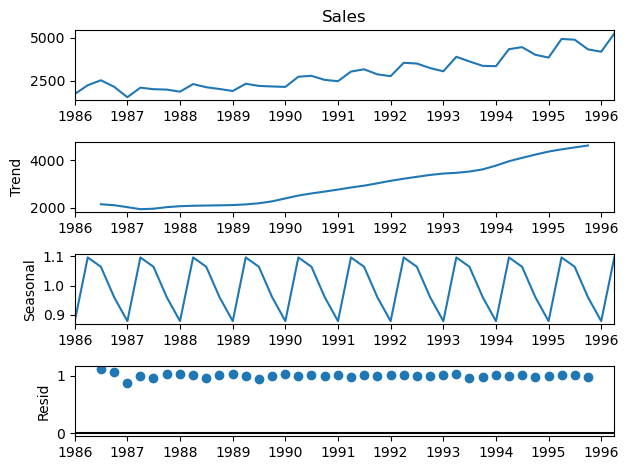

In [77]:
ts_mul = seasonal_decompose(cocacola_1.Sales,model="multiplicative")
fig = ts_mul.plot()
plt.show()

C:\Users\Amit D\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


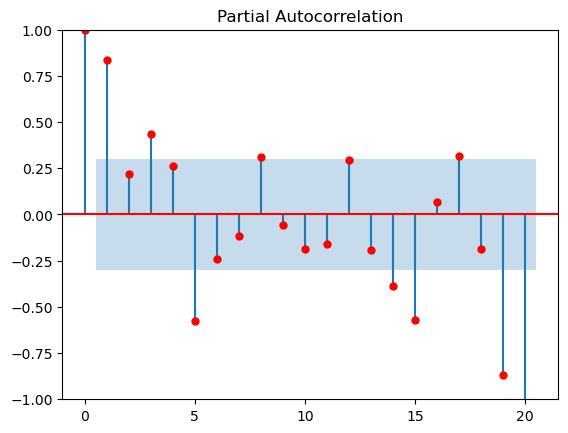

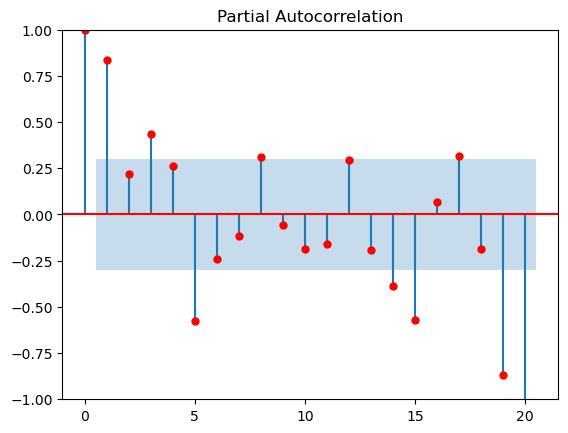

In [78]:
tsa_plots.plot_pacf(cocacola_1.Sales, lags=20,color='red')

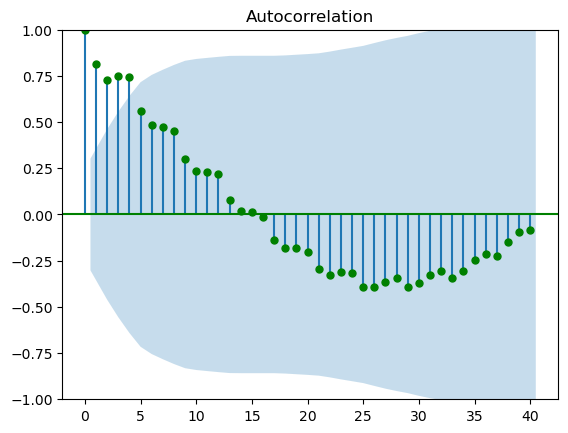

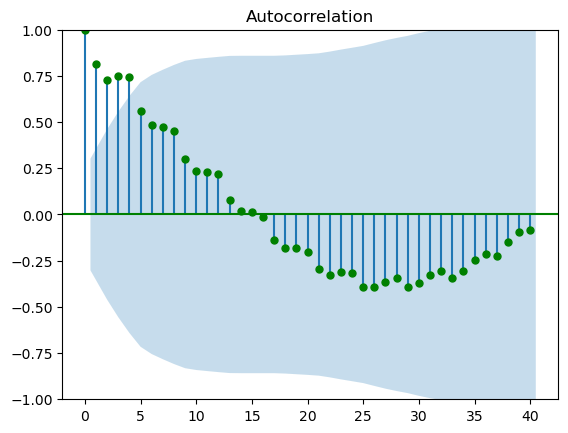

In [79]:
tsa_plots.plot_acf(cocacola_1.Sales, lags=40,color='green')

In [17]:
x = cocacola_1['Sales'].values

In [18]:
size = int(len(x) * 0.66)

In [19]:
train, test = x[0:size], x[size:len(x)]

In [20]:
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -174.082
Date:                Wed, 26 Jul 2023   AIC                            360.163
Time:                        21:18:35   BIC                            367.712
Sample:                             0   HQIC                           362.337
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1024      0.306     -0.335      0.738      -0.702       0.497
ar.L2         -0.2140      0.160     -1.338      0.181      -0.527       0.099
ar.L3         -0.0892      0.191     -0.468      0.6

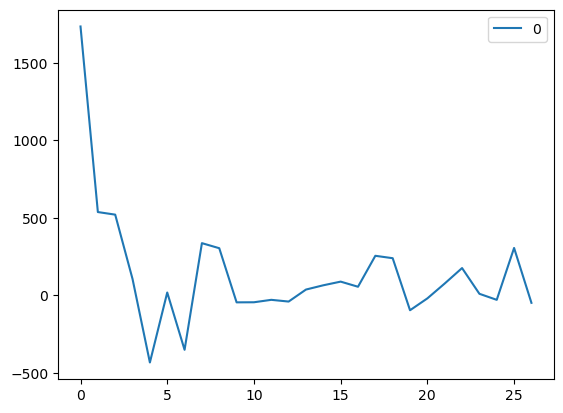

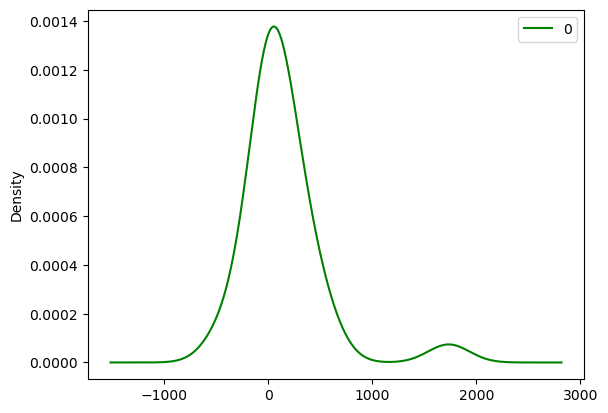

                 0
count    27.000000
mean    137.791853
std     385.970462
min    -433.659591
25%     -34.938858
50%      55.067399
75%     247.080157
max    1734.827000


In [21]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde',color='green')
pyplot.show()
print(residuals.describe())

In [22]:
history = [x for x in train]

In [23]:
predictions = list()

In [24]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3130.132565, expected=3243.859993
predicted=3167.315970, expected=3056.000000
predicted=3717.472606, expected=3899.000000
predicted=3775.837511, expected=3629.000000
predicted=3332.746318, expected=3373.000000
predicted=3258.573065, expected=3352.000000
predicted=4081.006044, expected=4342.000000


C:\Users\Amit D\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=3955.784554, expected=4461.000000
predicted=4146.277755, expected=4017.000000
predicted=3958.436338, expected=3854.000000
predicted=4701.652907, expected=4936.000000
predicted=4990.060379, expected=4895.000000
predicted=4390.352733, expected=4333.000000
predicted=4190.868308, expected=4194.000000
predicted=5176.966207, expected=5253.000000


C:\Users\Amit D\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
error = mean_squared_error(test, predictions)
'test MSE = %3f' %error

'test MSE = 34280.204621'

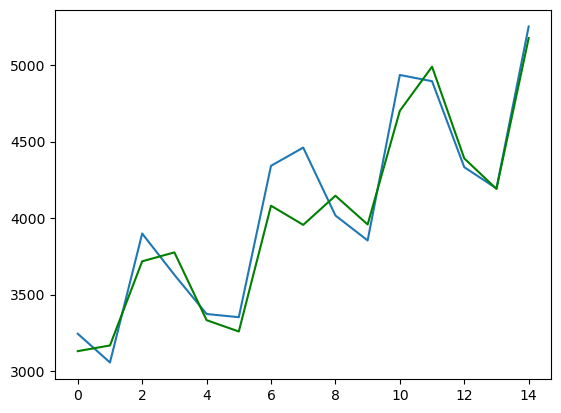

In [26]:
pyplot.plot(test)
pyplot.plot(predictions, color='green')
pyplot.show()

In [ ]:
# With the two lines it is clear that test and predictions are very near except for the data point indices from 6 to 8.

In [31]:
cocacola_2 = pd.get_dummies(cocacola_data, columns =['Quarter'])

In [32]:
cocacola_2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']
cocacola_2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
cocacola_2.head().T

,0,1,2,3,4
Sales,1734.827,2244.960999,2533.804993,2154.962997,1547.818996
Q1,1.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,1.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000


In [34]:
t= np.arange(1,43)

In [37]:
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42])

In [40]:
cocacola_2['t'] = t

In [43]:
W = t

In [48]:
cocacola_2['W'] = t

In [49]:
cocacola_2['t_sq'] = cocacola_2['t']*cocacola_2['t']

In [50]:
log_Sales=np.log(cocacola_2['Sales'])

In [51]:
cocacola_2['log_Sales']=log_Sales

In [52]:
cocacola_2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_Sales,W
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,7.458663,1
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,4,7.716443,2
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,9,7.837477,3
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,16,7.675529,4
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,25,7.344602,5


In [53]:
cocacola_2.head().T

,0,1,2,3,4
Sales,1734.827000,2244.960999,2533.804993,2154.962997,1547.818996
Q1,1.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,1.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000


In [54]:
train_1, test_1 = np.split(cocacola_2, [int(.67 *len(cocacola_2))])

In [55]:
linear= smf.ols('Sales ~ t',data=train_1).fit()
predlinear=pd.Series(linear.predict(pd.DataFrame(test_1['t'])))
rmselinear=np.sqrt((np.mean(np.array(test_1['Sales'])-np.array(predlinear))**2))
rmselinear

580.1224130918637

In [56]:
quad=smf.ols('Sales~t+t_sq',data=train_1).fit()
predquadratic=pd.Series(quad.predict(pd.DataFrame(test_1[['t','t_sq']])))
rmsequadratic=np.sqrt(np.mean((np.array(test_1['Sales'])-np.array(predquadratic))**2))
rmsequadratic

783.7297975037425

In [57]:
exp=smf.ols('log_Sales~t',data=train_1).fit()
predexp=pd.Series(exp.predict(pd.DataFrame(test_1['t'])))
rmseexp=np.sqrt(np.mean((np.array(test_1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexp

588.1405104900183

In [58]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train_1).fit()
predadditive=pd.Series(additive.predict(pd.DataFrame(test_1[['Q1','Q2','Q3','Q4']])))
rmseadditive=np.sqrt(np.mean((np.array(test_1['Sales'])-np.array(predadditive))**2))
rmseadditive

1869.7188209186954

In [59]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train_1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test_1[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test_1['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

596.1526282372528

In [60]:
addquad=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train_1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test_1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test_1['Sales'])-np.array(predaddquad))**2))
rmseaddquad

412.114443605461

In [61]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train_1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test_1[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test_1['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

2374.919440795444

In [62]:
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train_1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test_1[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test_1['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

5359.687911931751

In [63]:
mul_quad= smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train_1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test_1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test_1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3630.5619467352553

In [64]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadditive','rmseaddlinear','rmseaddquad','rmseexp','rmselinear','rmsemul','rmsemulin']),
          'Values':pd.Series([rmse_mul_quad,rmseadditive,rmseaddlinear,rmseaddquad,rmseexp,rmselinear,rmsemul,rmsemulin])}

In [65]:
rmse = pd.DataFrame(output)
rmse

,Model,Values
0,rmse_mul_quad,3630.561947
1,rmseadditive,1869.718821
2,rmseaddlinear,596.152628
3,rmseaddquad,412.114444
4,rmseexp,588.140510
5,rmselinear,580.122413
6,rmsemul,2374.919441
7,rmsemulin,5359.687912


In [66]:
print(rmse)

           Model       Values
0  rmse_mul_quad  3630.561947
1   rmseadditive  1869.718821
2  rmseaddlinear   596.152628
3    rmseaddquad   412.114444
4        rmseexp   588.140510
5     rmselinear   580.122413
6        rmsemul  2374.919441
7      rmsemulin  5359.687912


In [ ]:
# As lower the RMSE value suggests the better model performance i.e. model predictions are closure to the actual values so from above RMSE values its clear that - 
# The best model seems to be rmseaddquad with an RMSE of 412.114444. This model likely provides the most accurate predictions among the ones listed.
# rmseaddlinear and rmseexp also have relatively low RMSE values, suggesting they are performing well.
# rmsemul, rmseadditive, and rmselinear have intermediate RMSE values, indicating moderate prediction accuracy.
# rmse_mul_quad has the highest RMSE, indicating it is performing the worst among the listed models.